Deputado Histogramado
============

[expressao.xyz/deputado/](http://expressao.xyz/deputado/)

Como processar as sessões do parlamento Português

Índice
-----

1. [Reunír o dataset](Deputado-Histogramado-1.ipynb)
2. [Contando as palavras mais comuns](Deputado-Histogramado-2.ipynb)
3. [Fazendo histogramas](Deputado-Histogramado-3.ipynb)
4. [Representações geograficas](Deputado-Histogramado-4.ipynb)
5. [Simplificar o dataset e exportar para o expressa.xyz/deputado/](Deputado-Histogramado-5.ipynb)

O que se passou nas mais de 4000 sessões de discussão do parlamento Português que ocorreram desde 1976? 
Neste notebook vamos tentar visualizar o que se passou da maneira mais simples - contando palavras, e fazendo gráficos.

Para obter os textos de todas as sessões usaremos o [demo.cratica.org](demo.cratica.org), onde podemos aceder facilmente a todas as sessões do parlamento de 1976 a 2015. Depois com um pouco de python, pandas e matplotlib vamos analisar o que se passou.

Para executar estes notebook será necessário descarregar e abrir com o Jupiter Notebooks (a distribuição Anaconda faz com que instalar todas as ferramentas necessárias seja fácil - https://www.continuum.io/downloads)


## Parte 3 - Fazendo Histogramas

Código para carregar os dados do notebook anterior: 


In [1]:
%matplotlib inline
import pylab
import matplotlib
import pandas
import numpy


dateparse = lambda x: pandas.datetime.strptime(x, '%Y-%m-%d')
sessoes = pandas.read_csv('sessoes_democratica_org.csv',index_col=0,parse_dates=['data'], date_parser=dateparse)


Na parte 2 já ficamos a saber que 'Orçamento de/do Estado' não se usava antes de 1984, e se falava mais de decretos-lei antes de 1983.  


Mas sinceramente não encontramos nada de interessante. Vamos acelerar o processo, e olhar para mais palavras:


3.0117321014404297 s


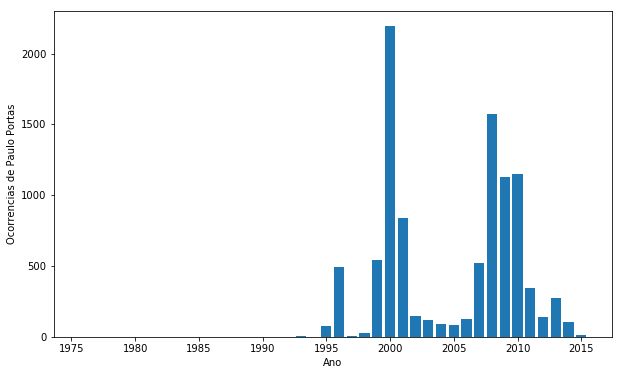

In [4]:
# retorna o número de ocorrências de palavra em texto
def conta_palavra(texto,palavra):
    return texto.count(palavra)

# retorna um vector com um item por sessao, e valor verdadeiro se o ano é =i, falso se nao é
def selecciona_ano(data,i):
    return data.map(lambda d: d.year == i)

# faz o histograma do número de ocorrencias de 'palavra' por ano
def histograma_palavra(palavra):
    # cria uma coluna de tabela contendo as contagens de palavra por cada sessão
    dados = sessoes['sessao'].map(lambda texto: conta_palavra(texto,palavra.lower()))
    
    ocorrencias_por_ano = numpy.zeros(2016-1976)
    for i in range(0,2016-1976):
        # agrupa contagens por ano
        ocorrencias_por_ano[i] = numpy.sum(dados[selecciona_ano(sessoes['data'],i+1976)])

    f = pylab.figure(figsize=(10,6))    
    ax = pylab.bar(range(1976,2016),ocorrencias_por_ano)
    pylab.xlabel('Ano')
    pylab.ylabel('Ocorrencias de '+str(palavra))

    
import time
start = time.time()
histograma_palavra('Paulo Portas') #já vimos que Paulo e Portas foram anormalmente frequentes em 2000, vamos ver se há mais eventos destes
print(str(time.time()-start)+' s') # mede o tempo que o código 'histograma_palavra('Paulo Portas')' demora a executar, para nossa referencia


Tal como tinhamos visto antes, o ano 2000 foi um ano bastante presente para o Paulo Portas. Parece que as suas contribuições vêm em ondas.


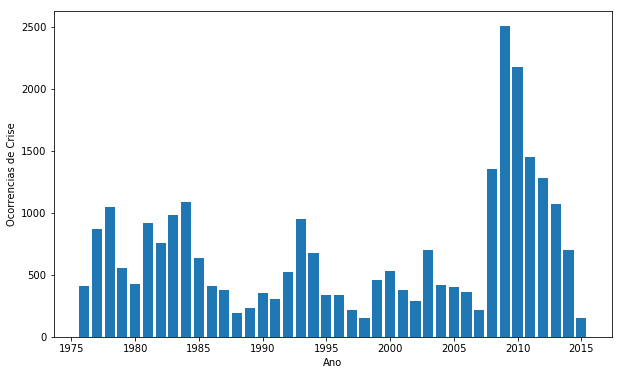

In [33]:
histograma_palavra('Crise')

Sempre se esteve em crise, mas em 2010 foi uma super-crise.

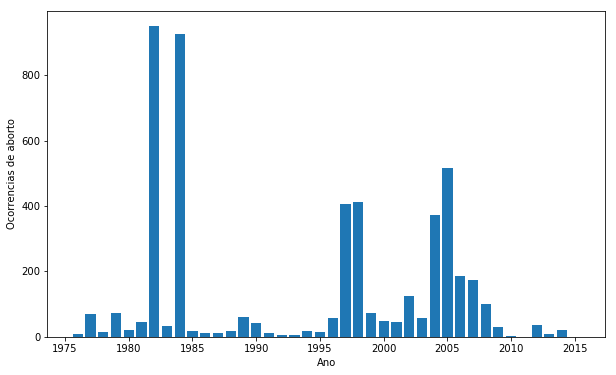

In [34]:
histograma_palavra('aborto')

Os debates sobre o aborto parecem estar bem localizados, a 1982, 1984, 1997/8 e 2005.

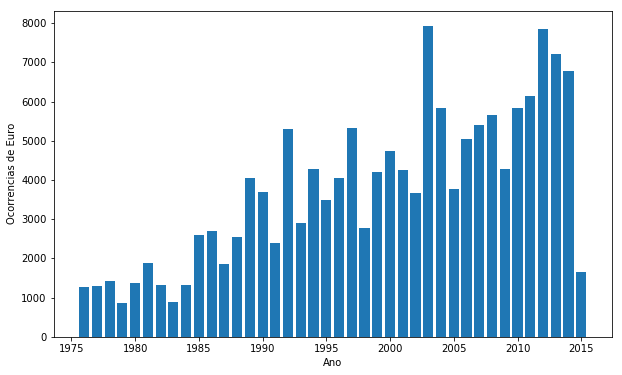

In [35]:
histograma_palavra('Euro')

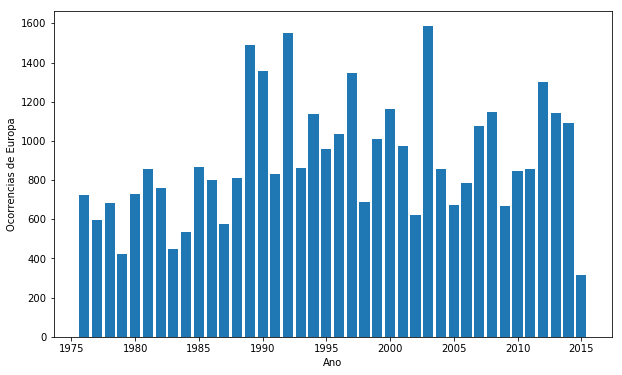

In [36]:
histograma_palavra('Europa')

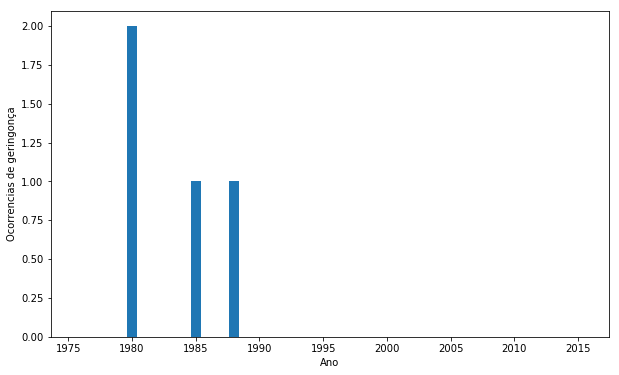

In [5]:
histograma_palavra('geringonça')

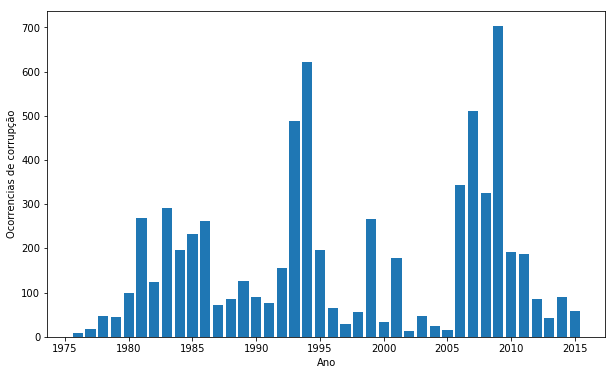

In [77]:
histograma_palavra('corrupção')

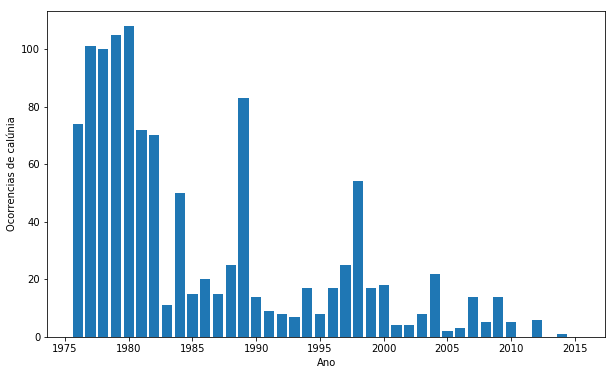

In [78]:
histograma_palavra('calúnia')

Saiu de moda. 

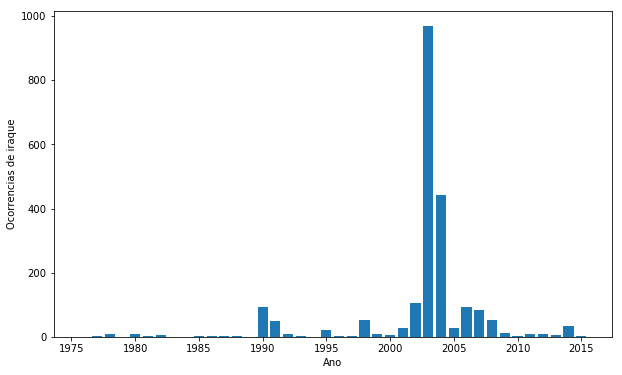

In [79]:
histograma_palavra('iraque')

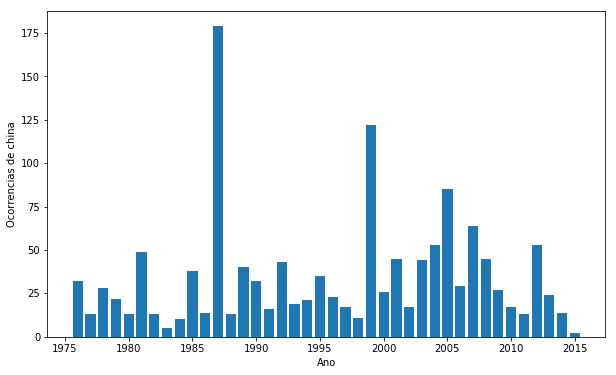

In [80]:
histograma_palavra('china')

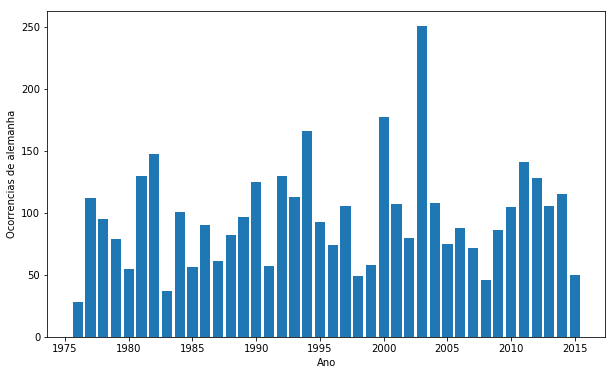

In [81]:
histograma_palavra('alemanha')

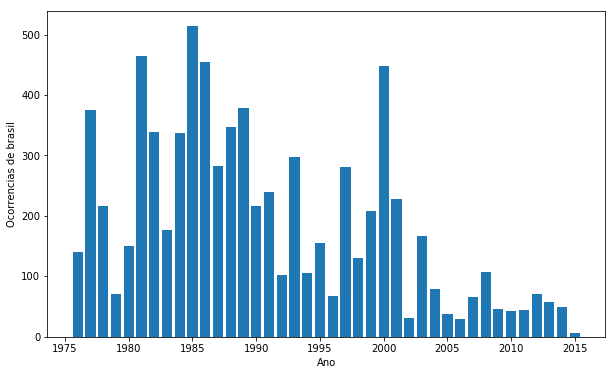

In [82]:
histograma_palavra('brasil')

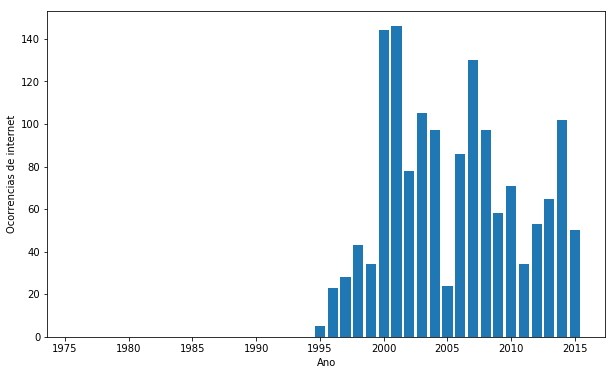

In [83]:
histograma_palavra('internet')

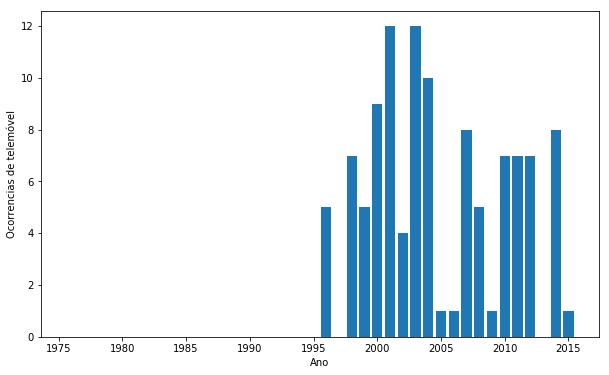

In [84]:
histograma_palavra('telemóvel')

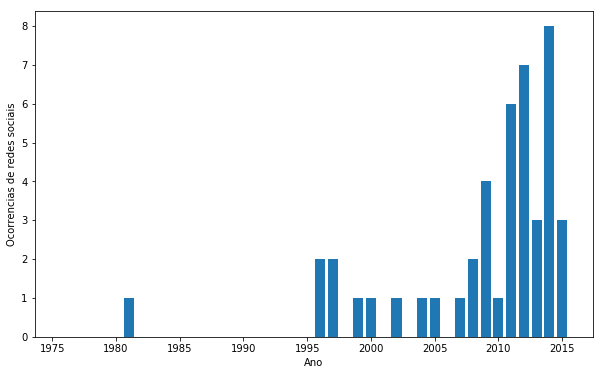

In [85]:
histograma_palavra('redes sociais')

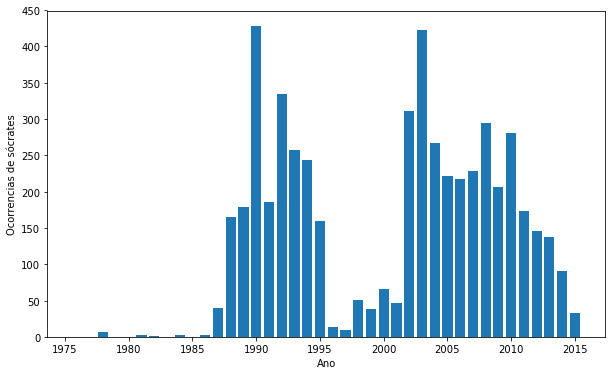

In [86]:
histograma_palavra('sócrates')

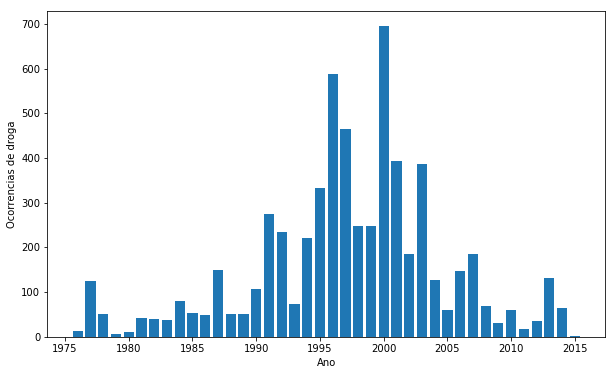

In [87]:
histograma_palavra('droga')

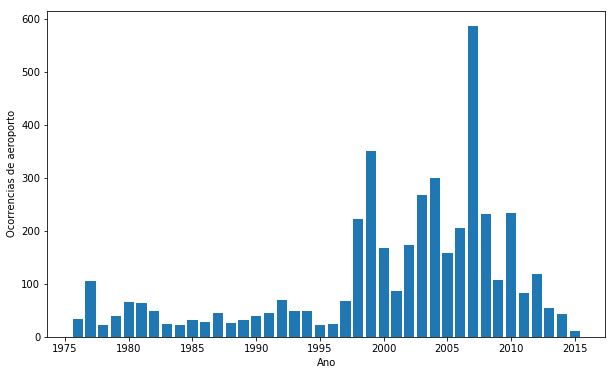

In [88]:
histograma_palavra('aeroporto')

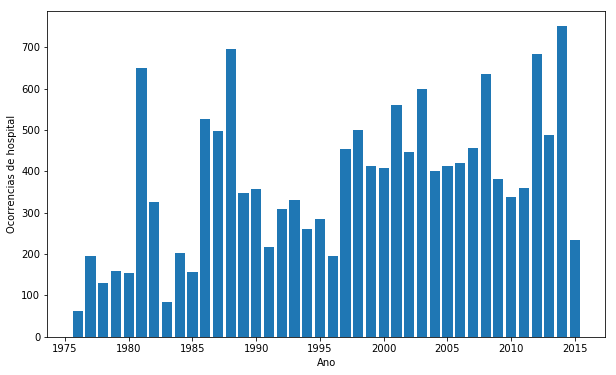

In [89]:
histograma_palavra('hospital')

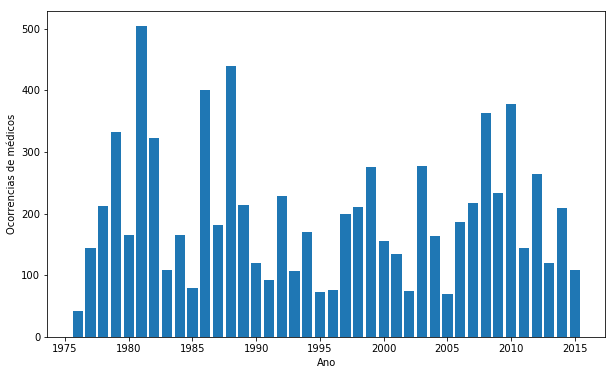

In [90]:
histograma_palavra('médicos')

e se quisermos acumular varias palavras no mesmo histograma?

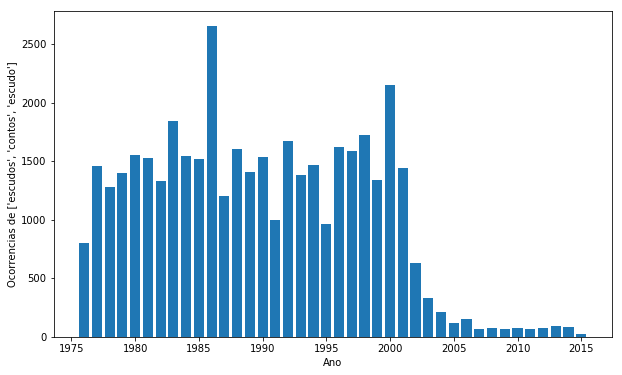

In [37]:
def conta_palavras(texto,palavras):
    l = [texto.count(palavra.lower()) for palavra in palavras]
    return sum(l)

def selecciona_ano(data,i):
    return data.map(lambda d: d.year == i)

def histograma_palavras(palavras):
    dados = sessoes['sessao'].map(lambda texto: conta_palavras(texto,palavras))

    ocorrencias_por_ano = numpy.zeros(2016-1976)
    for i in range(0,2016-1976):
        ocorrencias_por_ano[i] = numpy.sum(dados[selecciona_ano(sessoes['data'],i+1976)])

    f = pylab.figure(figsize=(10,6))    
    ax = pylab.bar(range(1976,2016),ocorrencias_por_ano)
    pylab.xlabel('Ano')
    pylab.ylabel('Ocorrencias de '+str(palavras))

histograma_palavras(['escudos','contos','escudo'])

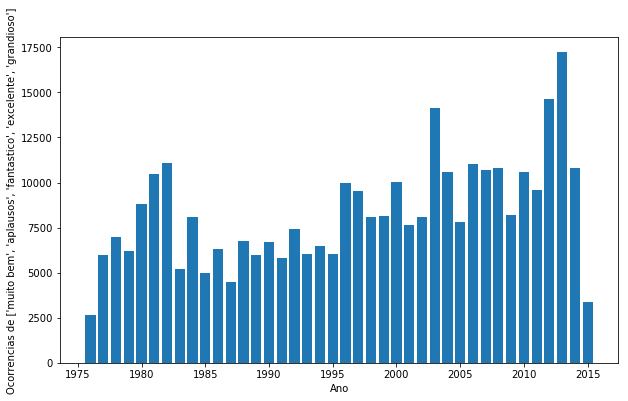

In [38]:
histograma_palavras(['muito bem','aplausos','fantastico','excelente','grandioso'])

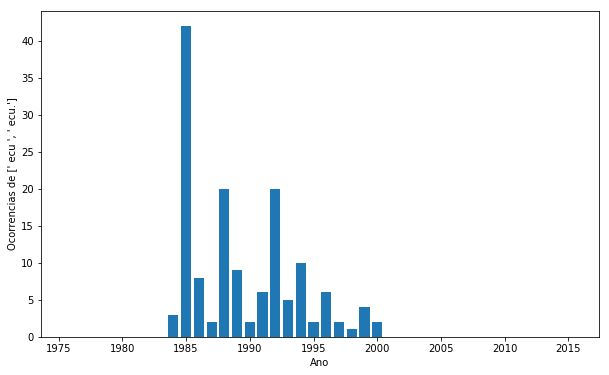

In [39]:
histograma_palavras([' ecu ',' ecu.'])

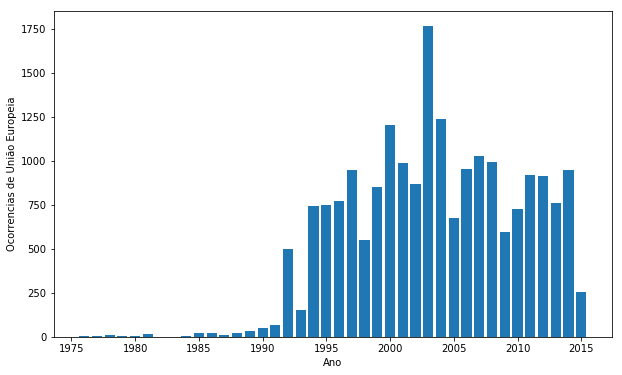

In [40]:
histograma_palavra('União Europeia')

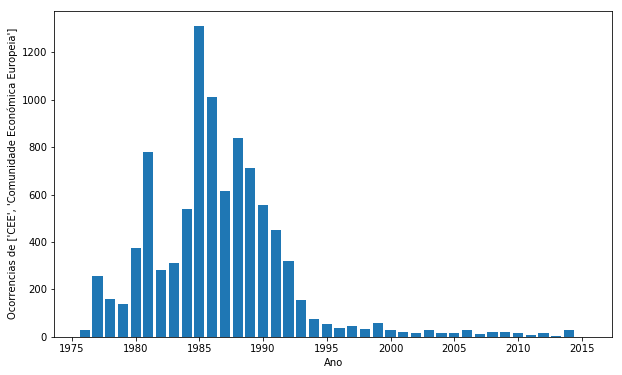

In [41]:
histograma_palavras(['CEE','Comunidade Económica Europeia'])

A União Europeia foi fundada em ~93 e a CEE integrada nesta (segundo a wikipedia), logo o gráfico faz sentido.
Vamos criar uma função para integrar os 2 graficos, para nos permitir comparar a evolução:


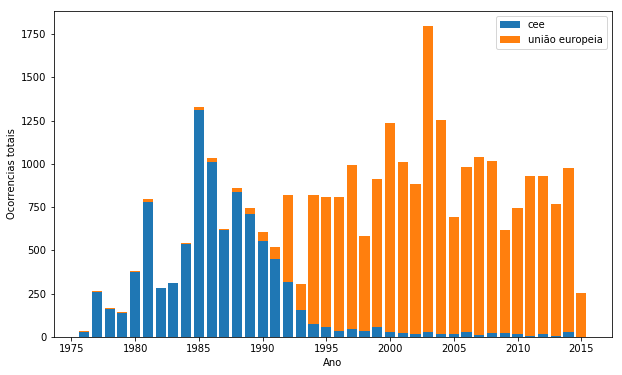

In [5]:
def conta_palavras(texto,palavras):
    l = [texto.count(palavra) for palavra in palavras]
    return sum(l)

def selecciona_ano(data,i):
    return data.map(lambda d: d.year == i)

# calcula os dados para os 2 histogramas, e representa-os no mesmo gráfico
def grafico_palavras_vs_palavras(palavras1, palavras2):
    palavras1 = [p.lower() for p in palavras1]
    palavras2 = [p.lower() for p in palavras2]
    dados = sessoes['sessao'].map(lambda texto: conta_palavras(texto,palavras1))
    ocorrencias_por_ano1 = numpy.zeros(2016-1976)
    for i in range(0,2016-1976):
        ocorrencias_por_ano1[i] = numpy.sum(dados[selecciona_ano(sessoes['data'],i+1976)])
        
    dados = sessoes['sessao'].map(lambda texto: conta_palavras(texto,palavras2))
    ocorrencias_por_ano2 = numpy.zeros(2016-1976)
    for i in range(0,2016-1976):
        ocorrencias_por_ano2[i] = numpy.sum(dados[selecciona_ano(sessoes['data'],i+1976)])

    anos = range(1976,2016)
    f = pylab.figure(figsize=(10,6))    
    p1 = pylab.bar(anos, ocorrencias_por_ano1)
    p2 = pylab.bar(anos, ocorrencias_por_ano2,bottom=ocorrencias_por_ano1)
    
    pylab.legend([palavras1[0], palavras2[0]])
    
    pylab.xlabel('Ano')
    pylab.ylabel('Ocorrencias totais')

grafico_palavras_vs_palavras(['CEE','Comunidade Económica Europeia'],['União Europeia'])

Boa, uma substitui a outra, basicamente.

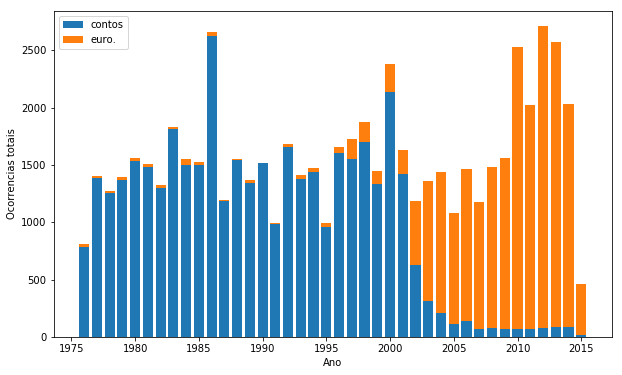

In [43]:
grafico_palavras_vs_palavras(['contos','escudo'],['euro.','euro ','euros'])

Novamente, uma substitui a outra.

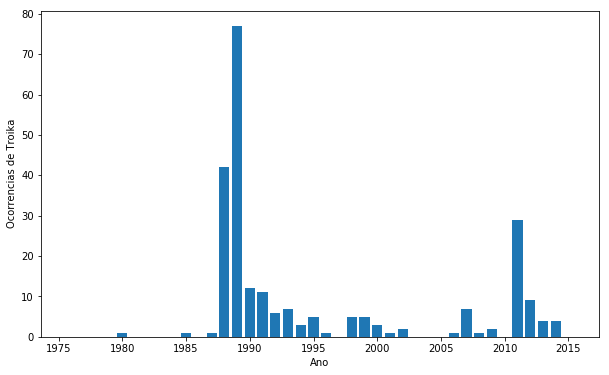

In [44]:
histograma_palavra('Troika')

Ok isto parece um mistério. Falava-se bastante mais da troika em 1989 do que 2011. Vamos investigar isto procurando e mostrando as frases onde as palavras aparecem.



Queremos saber o que foi dito quando se mencionou 'Troika' no parlamento. Vamos tentar encontrar e imprimir as frases onde se dão as >70 ocorrencias de troika de 1989 e as 25 de 2011.

In [6]:
sessoes_1989 = sessoes[selecciona_ano(sessoes['data'],1989)]
sessoes_2011 = sessoes[selecciona_ano(sessoes['data'],2011)]

def divide_em_frases(texto):
    return texto.replace('!','.').replace('?','.').split('.')

def acumula_lista_de_lista(l):
    return [j for x in l for j in x ]
    
def selecciona_frases_com_palavra(sessoes, palavra):
        frases_ = sessoes['sessao'].map(divide_em_frases)
        frases  = acumula_lista_de_lista(frases_)
        return  list(filter(lambda frase: frase.find(palavra) != -1, frases))


frases_com_troika1989 = selecciona_frases_com_palavra(sessoes_1989, 'troika')
print('Frases com troika em 1989: ' + str(len(frases_com_troika1989)))
frases_com_troika2011 = selecciona_frases_com_palavra(sessoes_2011, 'troika')
print('Frases com troika em 2011: ' + str(len(frases_com_troika2011)))

Frases com troika em 1989: 73
Frases com troika em 2011: 26


In [8]:
from IPython.display import Markdown, display

#print markdown permite-nos escrever a negrito ou como título
def print_markdown(string):
    display(Markdown(string))

def imprime_frases(lista_de_frases, palavra_negrito):
    for i in range(len(lista_de_frases)):
        string = lista_de_frases[i].replace(palavra_negrito,'**' + palavra_negrito + '**')
        #print_markdown(str(i+1) + ':' + string) 
        print(str(i+1) + ':' + string) 
        # no Jupyter notebooks 4.3.1 não se pode gravar output em markdown, tem de ser texto normal
        # se estiverem a executar o notebook e não a ler no github, podem descomentar a linha anterior para ver o texto com formatação
#print_markdown('1989:\n====')
print('1989:\n====')
imprime_frases(frases_com_troika1989[1:73:5],'troika')
#print_markdown('2011:\n====')
print('2011:\n====')
imprime_frases(frases_com_troika2011[1:20:2],'troika')


1989:
====
1: narana coissoró (cds): - ainda há a peres**troika**, que é uma revolução
2: isto foi uma graça, não me levem a mal - nós estamos a fazer uma «peres**troika**», com certeza
3: implacável nos propósitos políticos com o mesmo a vontade com que cambalescamente vai silenciando as vozes criticas que no interior do seu partido clamam pela peres**troika** o líder comunista explicou aos portugueses em conferência de imprensa a seguinte e idêntica do diário popular de 30 de agosto de 1989
4:  que o pcp nada mudou dizem-no os seus próprios dirigentes, adversários declarados de quaisquer reformas, de qualquer tímida peres**troika**, mas di-lo também a sua continuada prática partidária
5: deputado, que talvez indicie uma peres**troika** no partido comunista
6:  primeiro do que tudo, a peres**troika** está longe de ser irreversível
7: ministro referiu as consequências que poderá ter a peres**troika** e também aquilo que será a reunificação alemã
8:  esta evolução, para que contribuem, 


Como vemos na última frase, a verdade é que no parlmento se usa mais o termo 'Troica' do que 'Troika'! Na comunicação social usa-se muito 'Troika'.
E para quem não sabe o que foi a perestroika: https://pt.wikipedia.org/wiki/Perestroika



Ok, assim já faz sentido:


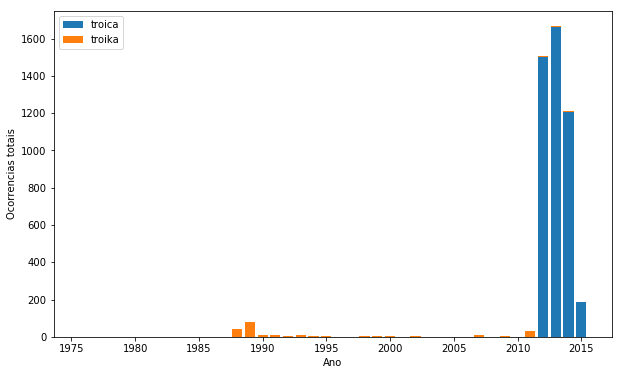

In [8]:
def conta_palavras(texto,palavras):
    l = [texto.count(palavra) for palavra in palavras]
    return sum(l)

def selecciona_ano(data,i):
    return data.map(lambda d: d.year == i)

# calcula os dados para os 2 histogramas, e representa-os no mesmo gráfico
def grafico_palavras_vs_palavras(palavras1, palavras2):
    palavras1 = [p.lower() for p in palavras1]
    palavras2 = [p.lower() for p in palavras2]
    dados = sessoes['sessao'].map(lambda texto: conta_palavras(texto,palavras1))
    ocorrencias_por_ano1 = numpy.zeros(2016-1976)
    for i in range(0,2016-1976):
        ocorrencias_por_ano1[i] = numpy.sum(dados[selecciona_ano(sessoes['data'],i+1976)])
        
    dados = sessoes['sessao'].map(lambda texto: conta_palavras(texto,palavras2))
    ocorrencias_por_ano2 = numpy.zeros(2016-1976)
    for i in range(0,2016-1976):
        ocorrencias_por_ano2[i] = numpy.sum(dados[selecciona_ano(sessoes['data'],i+1976)])

    anos = range(1976,2016)
    f = pylab.figure(figsize=(10,6))    
    p1 = pylab.bar(anos, ocorrencias_por_ano1)
    p2 = pylab.bar(anos, ocorrencias_por_ano2,bottom=ocorrencias_por_ano1)
    
    pylab.legend([palavras1[0], palavras2[0]])
    
    pylab.xlabel('Ano')
    pylab.ylabel('Ocorrencias totais')

grafico_palavras_vs_palavras(['troica'],['troika'])